Parte #1

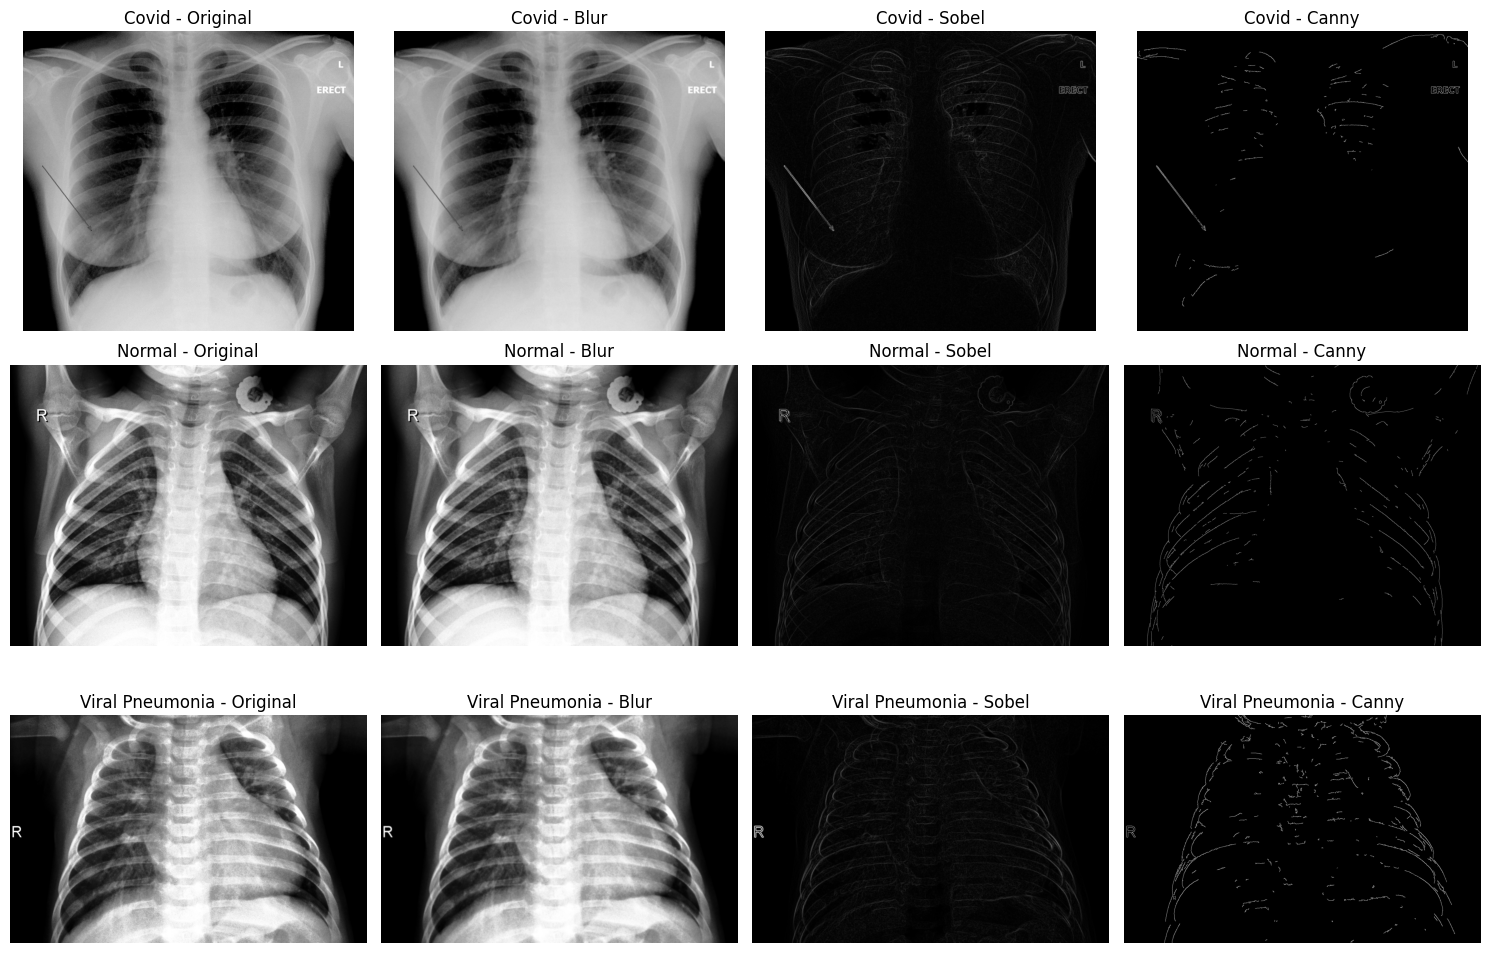

In [1]:
import cv2
import os
from matplotlib import pyplot as plt

# Ruta base del dataset
dataset_path = 'Covid19-dataset/test'

# Subcarpetas que contienen las imágenes
categories = ['Covid', 'Normal', 'Viral Pneumonia']

# Crear un diccionario para almacenar las imágenes
images = {}

# Cargar la primera imagen de cada subcarpeta
for category in categories:
    folder_path = os.path.join(dataset_path, category)
    image_files = os.listdir(folder_path)
    
    if len(image_files) > 0:
        # Cargar la primera imagen
        image_path = os.path.join(folder_path, image_files[0])
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        images[category] = image
    else:
        print(f"No se encontraron imágenes en la carpeta {category}")

# Función para aplicar los filtros
def apply_filters(image):
    # 1. Blur Filter
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

    # 2. Sobel Edge Detection
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)  # Sobel en el eje X
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)  # Sobel en el eje Y
    sobel_combined = cv2.magnitude(sobelx, sobely)

    # 3. Canny Edge Detection
    canny_edges = cv2.Canny(image, 100, 200)
    
    return blurred_image, sobel_combined, canny_edges

# Aplicar los filtros y mostrar las imágenes
plt.figure(figsize=(15, 10))

index = 1
for category, image in images.items():
    blurred_image, sobel_combined, canny_edges = apply_filters(image)
    
    # Mostrar la imagen original
    plt.subplot(len(categories), 4, index)
    plt.imshow(image, cmap='gray')
    plt.title(f'{category} - Original')
    plt.axis('off')
    
    # Mostrar la imagen con Blur
    plt.subplot(len(categories), 4, index + 1)
    plt.imshow(blurred_image, cmap='gray')
    plt.title(f'{category} - Blur')
    plt.axis('off')

    # Mostrar la imagen con Sobel
    plt.subplot(len(categories), 4, index + 2)
    plt.imshow(sobel_combined, cmap='gray')
    plt.title(f'{category} - Sobel')
    plt.axis('off')
    
    # Mostrar la imagen con Canny
    plt.subplot(len(categories), 4, index + 3)
    plt.imshow(canny_edges, cmap='gray')
    plt.title(f'{category} - Canny')
    plt.axis('off')

    index += 4

plt.tight_layout()
plt.show()
